In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures


## Problem Statement
 
#### An overseas automobile company, TCD Auto, aims to enter the competitive US market by establishing a local manufacturing unit. To effectively compete with established car brands, TCD Auto has engaged an automotive consulting firm to analyze the key factors influencing car prices in the American market. The company seeks answers to the following questions:

- Identifying Significant Variables: Which factors play a crucial role in predicting the price of cars in the American market?

- Assessing Predictive Accuracy: How effectively do these identified variables explain and predict car prices?

- Through this analysis, TCD Auto aims to gain insights into the unique dynamics of the US market and leverage these insights to strategize their market entry and pricing decisions effectively.

In [167]:
df = pd.read_csv(r'C:\Users\Sam\Downloads\CarPrice.csv')


In [168]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [169]:
# check Missing value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [170]:
# Check Duplication
print(df.duplicated().sum())

0


In [171]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [172]:
# Check the number of unique values of each column and select 
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [173]:
# now we will drop some column to only contain attribute that can help us understand the trend of price 
df = df.drop(columns=['car_ID'])
df = df.drop(columns=['enginelocation'])
df = df.drop(columns=['peakrpm'])

In [174]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,109.1,188.8,68.9,...,six,145,idi,3.01,3.40,23.0,106,26,27,22470.0


In [175]:
# I want to add a new feature that takes the average of city and highway mpg. Most of the daily commute will be highway and city 
df['averageMPG'] = df[['citympg', 'highwaympg']].mean(axis=1)

In [176]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg,price,averageMPG
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,25.219512,30.751220,13276.710571,27.985366
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,6.542142,6.886443,7988.852332,6.666038
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,13.000000,16.000000,5118.000000,15.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,19.000000,25.000000,7788.000000,22.500000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,24.000000,30.000000,10295.000000,27.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,30.000000,34.000000,16503.000000,32.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,49.000000,54.000000,45400.000000,51.500000


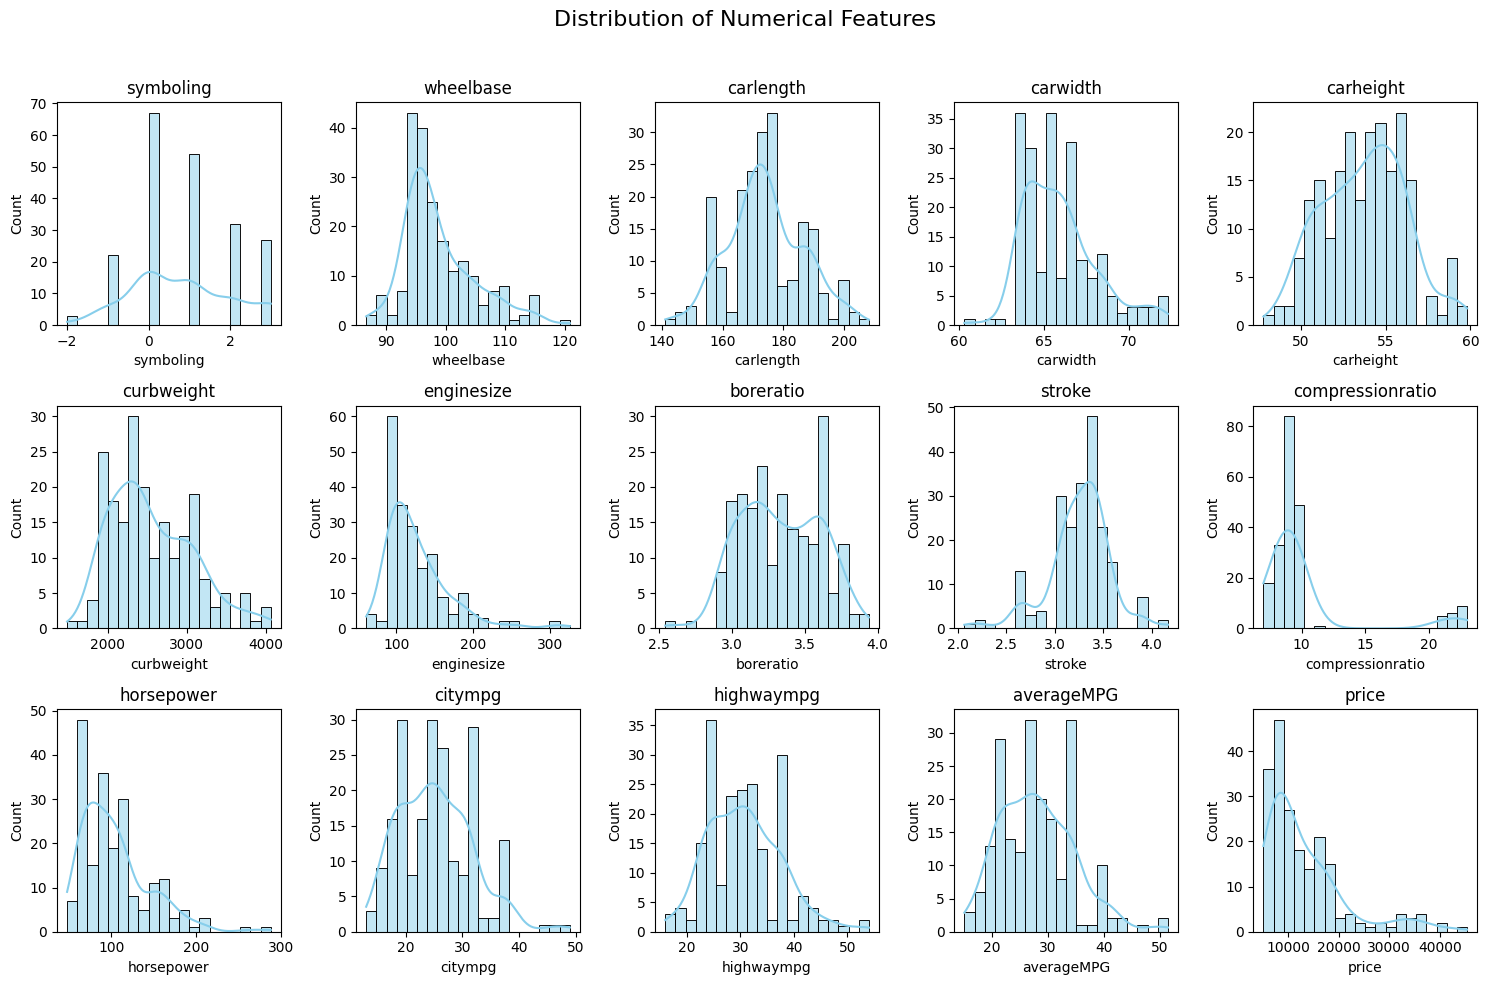

In [177]:
# Now we can look at the distribute of each numberic attribute 
# Define the numerical features
numerical_features = ['symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'citympg', 'highwaympg','averageMPG','price']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over numerical features and plot each one
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(feature, fontsize=12)
  

# Remove any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

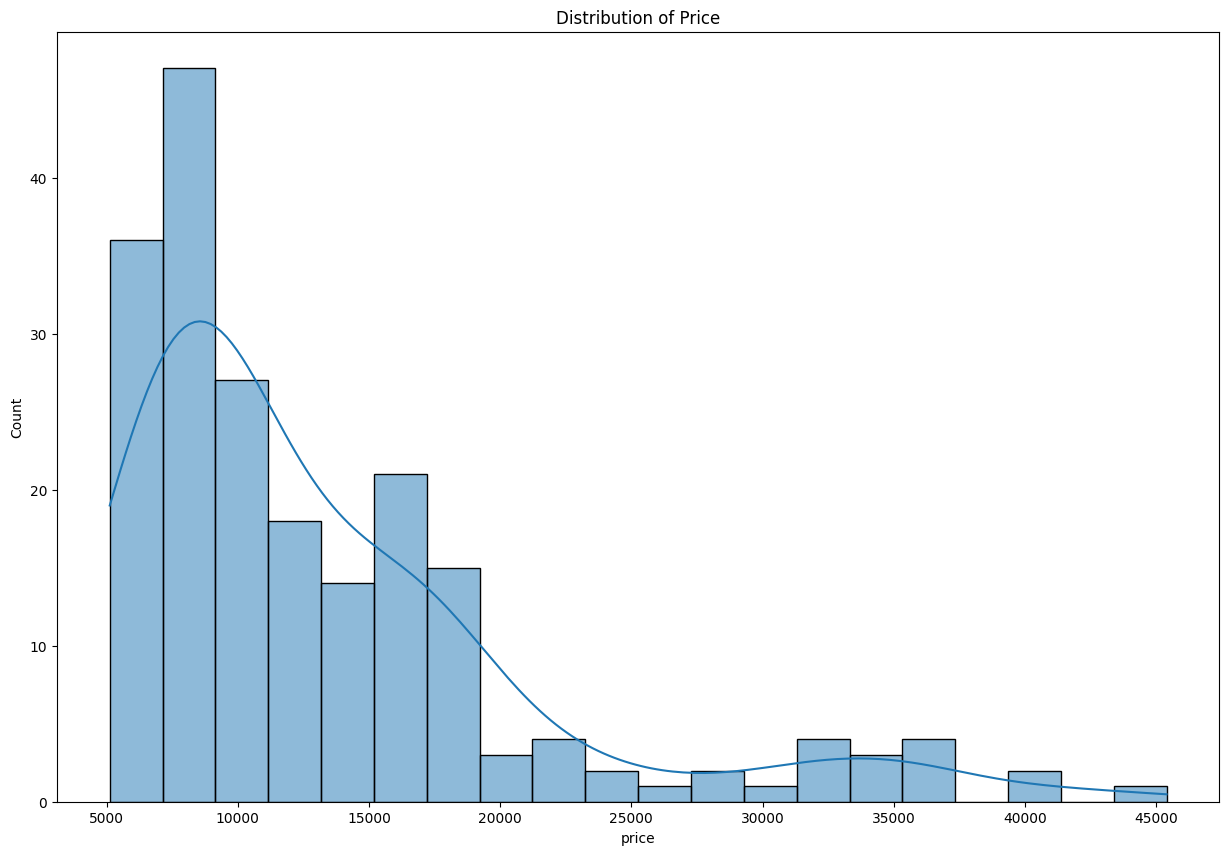

In [178]:
# now we look at the price distribute 
plt.figure(figsize=(15, 10))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

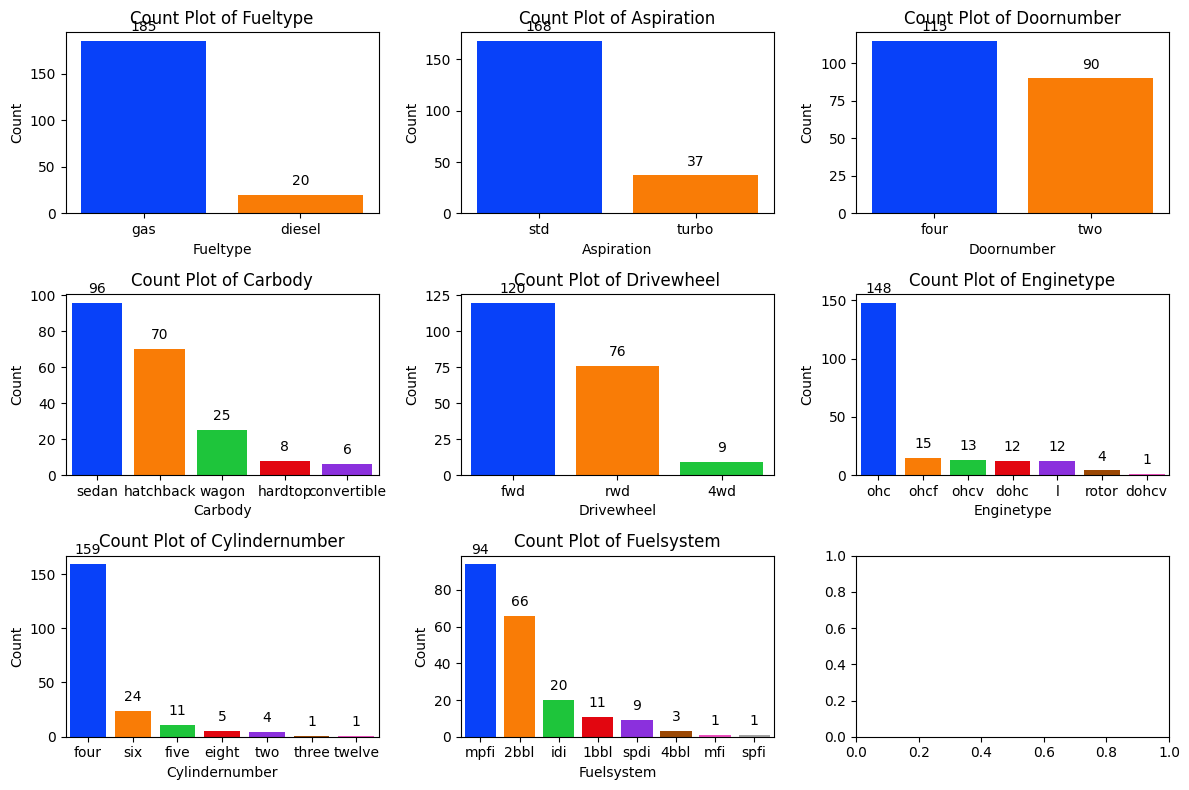

In [179]:
# Asipration engine means an internal combustion engine in which air intake depends solely on atmospheric pressure and does not have forced induction through a turbocharger or a supercharger and turbo engine will push air into engine to create more power however it will create lag on the power deliverey 
# Define the list of categorical columns to analyze
# each enginetype are different by where camshaft is placed inside the engine  

categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                        'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, palette='bright', ax=axes[i], saturation=0.95, order=df[column].value_counts().index)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

    # Annotate each bar with its count value
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points',
                         fontsize=10,
                         color='black')

plt.tight_layout()
plt.show()

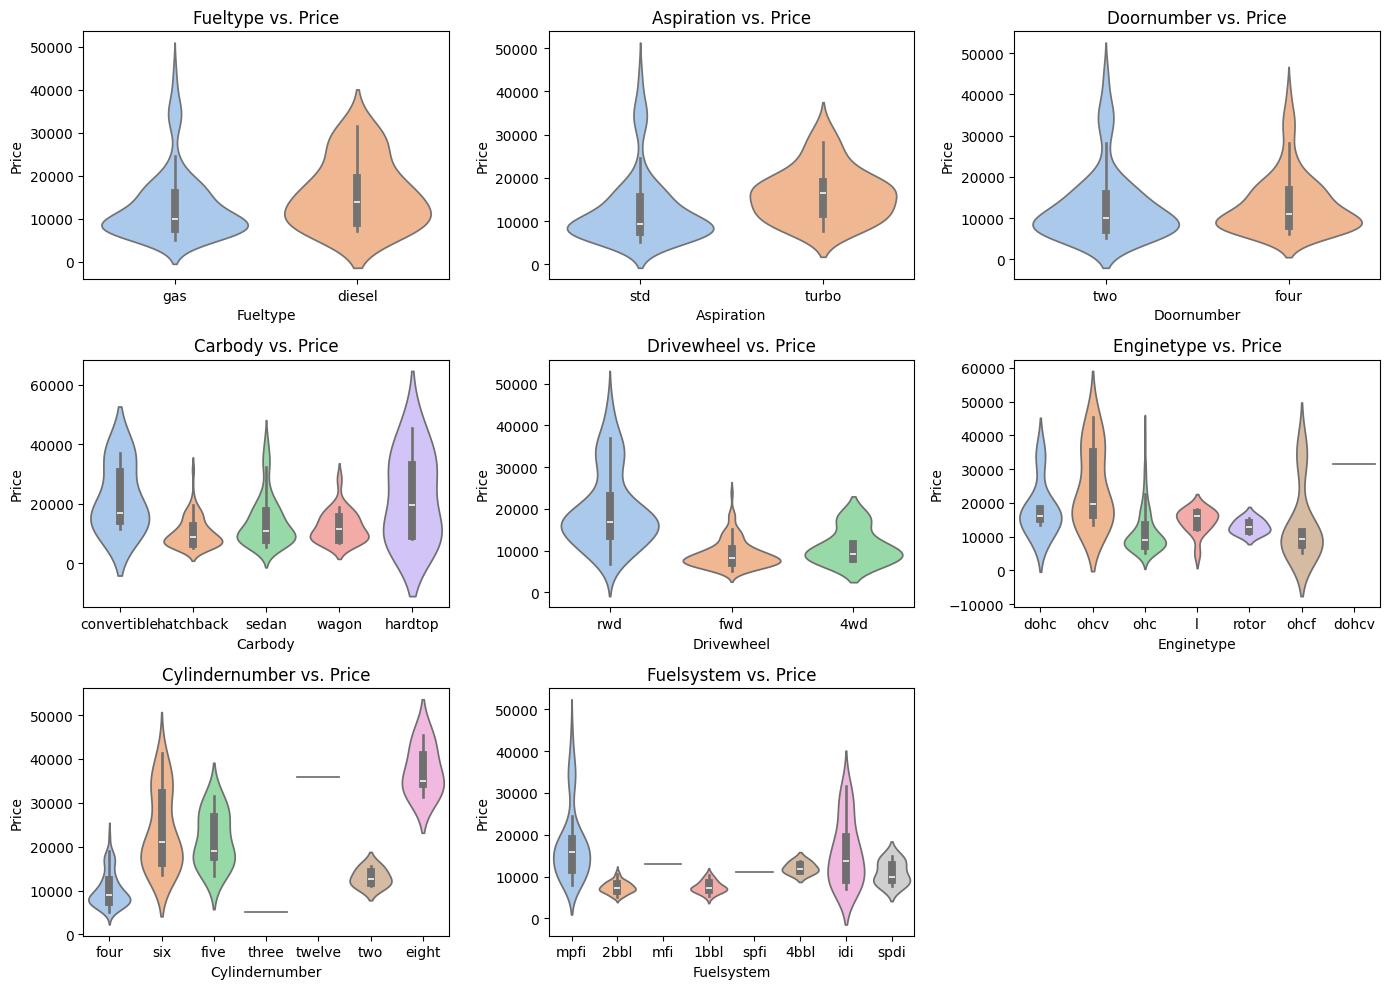

In [180]:
# Loop through each categorical column
plt.figure(figsize=(14, 10))
for idx, feature in enumerate(categorical_columns):
    plt.subplot(3, 3, idx + 1)
    sns.violinplot(data=df, x=feature, y='price', palette='pastel', inner='box')
    plt.title(f'{feature.capitalize()} vs. Price', fontsize=12)
    plt.xlabel(feature.capitalize(), fontsize=10)
    plt.ylabel('Price', fontsize=10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

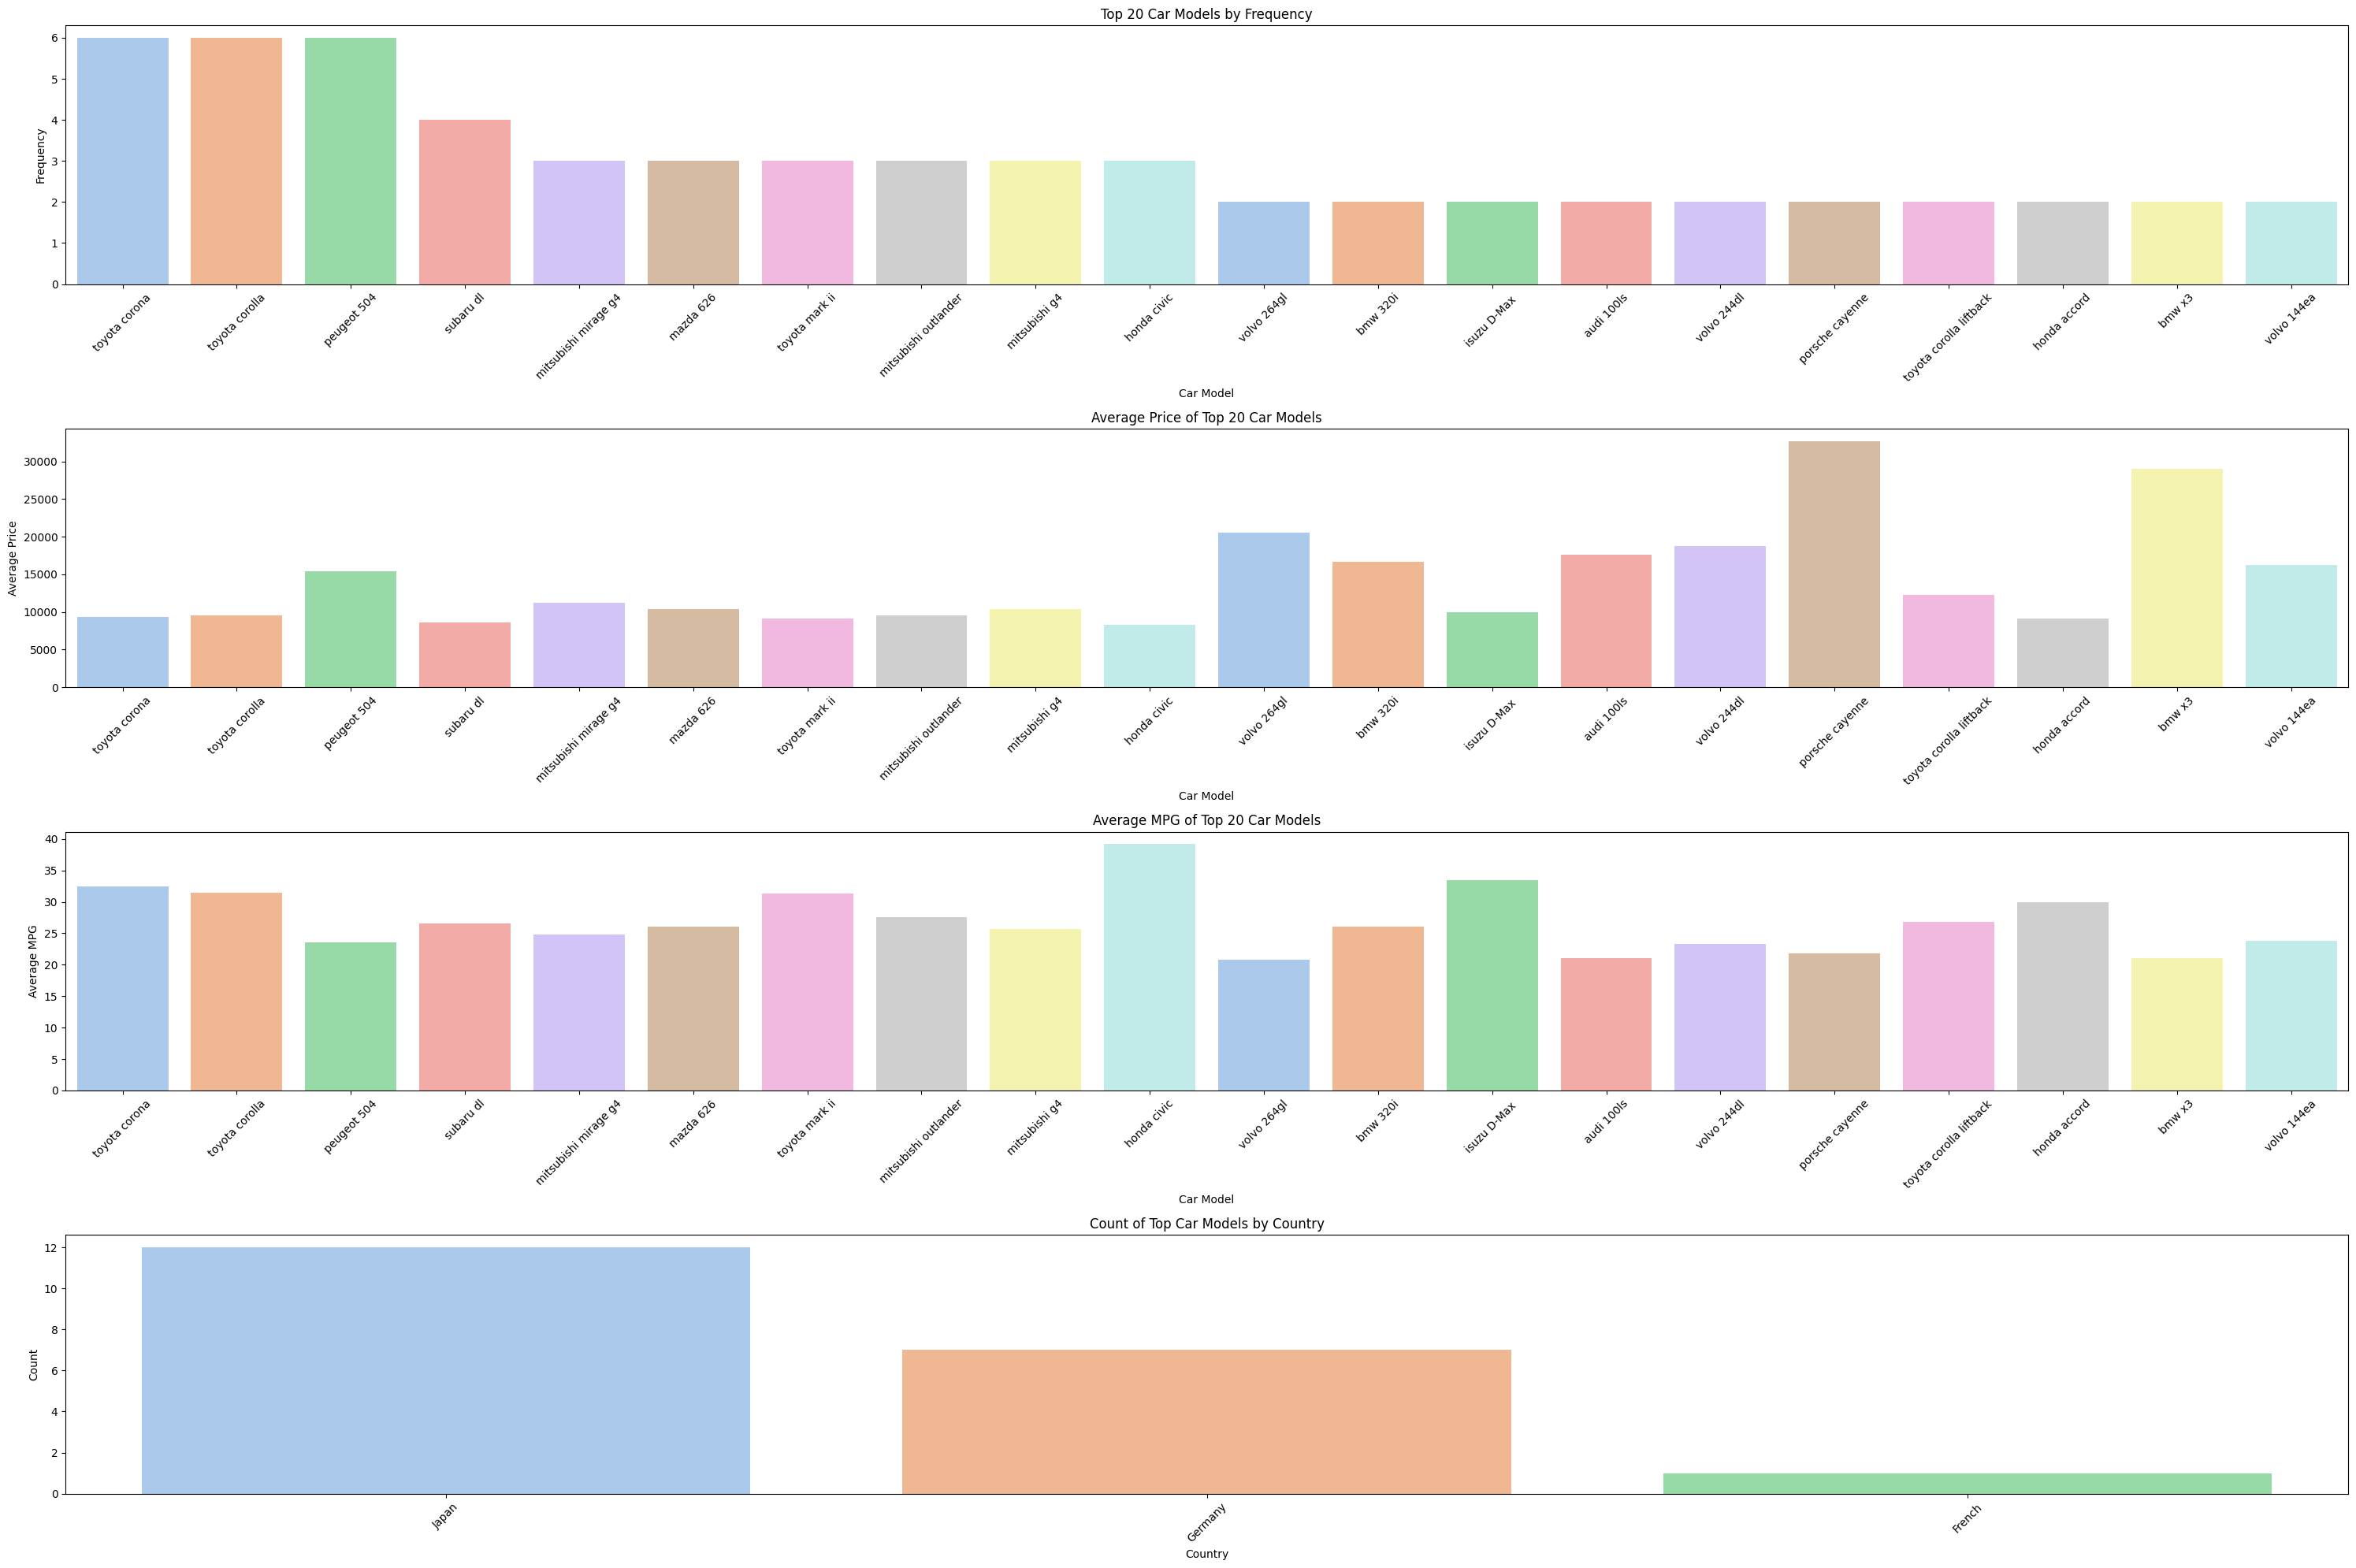

In [181]:
# Define a mapping of car models to countries
country_mapping = {
    'toyota': 'Japan', 'honda': 'Japan', 'mazda': 'Japan', 
    'mitsubishi': 'Japan', 'bmw': 'Germany', 'audi': 'Germany', 
    'volvo': 'Germany', 'peugeot': 'French', 'subaru': 'Japan', 
    'isuzu': 'Japan', 'porsche': 'Germany'
}

# Number of top car models to plot
n = 20

# Calculate top car models by frequency
top_car_models = df['CarName'].value_counts().head(n).index

# Apply the mapping to create a new column 'Country'
top_car_country = top_car_models.str.split().str[0].map(country_mapping).fillna('Other')
country_counts = top_car_country.value_counts()

# Calculate average price for each top car model
average_prices = df.groupby('CarName')['price'].mean().loc[top_car_models]

# Calculate average MPG for each top car model
average_mpg = df.groupby('CarName')['averageMPG'].mean().loc[top_car_models]

# Plotting
plt.figure(figsize=(30, 20))  # Adjust figure size as needed

# Plotting frequency
plt.subplot(4, 1, 1)
sns.barplot(x=top_car_models, y=df['CarName'].value_counts().head(n).values, palette='pastel')
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Car Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Plotting average price
plt.subplot(4, 1, 2)
sns.barplot(x=top_car_models, y=average_prices.values, palette='pastel')
plt.title(f'Average Price of Top {n} Car Models')
plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Plotting average MPG
plt.subplot(4, 1, 3)
sns.barplot(x=top_car_models, y=average_mpg.values, palette='pastel')
plt.title(f'Average MPG of Top {n} Car Models')
plt.xlabel('Car Model')
plt.ylabel('Average MPG')
plt.xticks(rotation=45)

# Plotting count of top car models by country
plt.subplot(4, 1, 4)
sns.barplot(x=country_counts.index, y=country_counts.values, palette='pastel')
plt.title('Count of Top Car Models by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [189]:
# Filter the DataFrame to only include rows with top car models
top_cars_df = df[df['CarName'].isin(top_car_models)]

# Display a table with relevant attributes for the top car models
relevant_columns = ['CarName', 'horsepower', 'curbweight', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',  'cylindernumber']
top_cars_table = top_cars_df[relevant_columns]

# Define aggregation functions for each column
aggregation_functions = {
    'horsepower': 'mean',
    'curbweight': 'mean',
    'fueltype': lambda x: x.mode()[0],
    'aspiration': lambda x: x.mode()[0],
    'doornumber': lambda x: x.mode()[0],
    'carbody': lambda x: x.mode()[0],
    'drivewheel': lambda x: x.mode()[0],
    'cylindernumber': lambda x: x.mode()[0],
}

# Group by 'CarName' and apply aggregation functions
grouped_df = top_cars_table.groupby('CarName').agg(aggregation_functions).reset_index()

# Display the combined results
display(grouped_df)

,CarName,horsepower,curbweight,fueltype,aspiration,doornumber,carbody,drivewheel,cylindernumber
0,audi 100ls,112.500000,2834.000000,gas,std,four,sedan,4wd,five
1,bmw 320i,101.000000,2395.000000,gas,std,four,sedan,rwd,four
2,bmw x3,151.500000,3135.000000,gas,std,four,sedan,rwd,six
3,honda accord,86.000000,2304.000000,gas,std,four,hatchback,fwd,four
4,honda civic,73.000000,2005.000000,gas,std,two,hatchback,fwd,four
5,isuzu D-Max,80.000000,2304.000000,gas,std,two,hatchback,fwd,four
6,mazda 626,89.666667,2396.666667,gas,std,two,hatchback,fwd,four
7,mitsubishi g4,111.666667,2464.666667,gas,turbo,two,hatchback,fwd,four
8,mitsubishi mirage g4,125.666667,2566.333333,gas,turbo,two,hatchback,fwd,four
9,mitsubishi outlander,109.666667,2413.333333,gas,turbo,two,hatchback,fwd,four


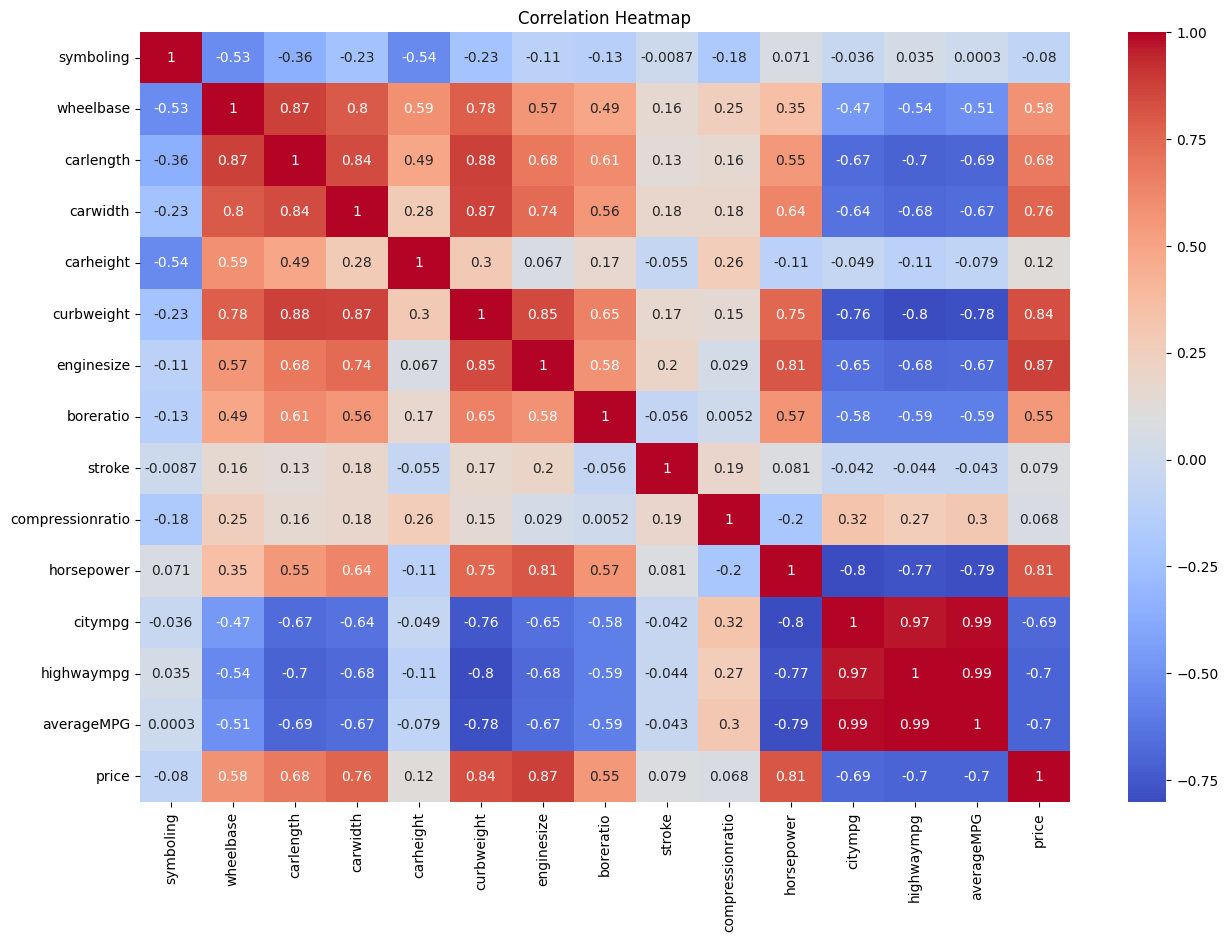

In [146]:

# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [157]:
# Extract brand and model from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel',
                        'cylindernumber','drivewheel', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth',  'curbweight',
                     'enginesize',  'horsepower']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [160]:


X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Display predicted vs actual values
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(pred_df.head())

Mean Squared Error: 13461089.14587618
R-squared: 0.8294856406364672
        Actual     Predicted
15   30760.000  25998.606067
9    17859.167  15561.376660
100   9549.000  11198.881066
132  11850.000  14490.332773
68   28248.000  27289.276903


In [152]:
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Degree {degree}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print()

Degree 1:
Mean Squared Error (MSE): 13461089.131801337
R-squared (R2): 0.8294856408147562

Degree 2:
Mean Squared Error (MSE): 3385770032.1168303
R-squared (R2): -41.88823896211343

Degree 3:
Mean Squared Error (MSE): 12214218022.505524
R-squared (R2): -153.71998875158496

Degree 4:
Mean Squared Error (MSE): 75761820344.1773
R-squared (R2): -958.6904173359586

Degree 5:
Mean Squared Error (MSE): 25745061942.17899
R-squared (R2): -325.11794604970504



## Conclusion 
 
#### This machine model can help TCD to predict car price based on the given attribute and data. In the EDA analaysis, I identify what the important attribute to look at for numerical and catagorical features. If TCD want to know what their car price should be range, they can also use the model to predict the price for them. They can pass the attribute value for their own car and find out the reasonable price. However, this set of data is more focus on sedan size car and not SUV or truck. If TCD would like to focus on different size car then this model will need more data on different sizes to train and test on the accuracy. 
#### we can see the model has around 87% accuracy for the data and accross different degrees apporach, the linear regression shows the best result in the R-squred and MSE

